# Closest Pair Of Points

Given a list of `points` of coordinates `(x, y)` find the closest pair of `points` that has the minimum distance `d` between points.


### Generate Points

Generate a list of points `n` of coordinates `(x, y)` using the random module. 

In [44]:
import random
import matplotlib.pyplot as plt

# Number of points
n = 100
# Space of dimension sz
sz = 1000
# List of points : tuple(x, y)
points = list()

for i in range(n):
    p = (random.randint(0, sz), random.randint(0, sz))
    # Avoid collision
    if p not in points:
        points.append(p)
    
print(points)

[(301, 430), (198, 83), (766, 145), (559, 282), (386, 334), (962, 189), (17, 600), (743, 962), (189, 862), (870, 777), (940, 832), (34, 224), (213, 725), (994, 134), (74, 229), (412, 845), (971, 352), (6, 133), (757, 673), (507, 545), (344, 856), (303, 811), (970, 460), (328, 431), (348, 656), (792, 441), (742, 513), (705, 383), (329, 70), (77, 485), (855, 702), (940, 663), (100, 10), (286, 422), (534, 967), (780, 436), (577, 578), (67, 880), (282, 497), (784, 781), (21, 677), (619, 211), (504, 174), (52, 619), (959, 65), (459, 117), (363, 241), (10, 855), (985, 978), (593, 579), (905, 419), (103, 527), (540, 75), (439, 245), (914, 661), (598, 93), (856, 962), (807, 301), (331, 326), (294, 410), (282, 264), (970, 772), (131, 467), (50, 489), (269, 598), (535, 814), (951, 266), (787, 367), (275, 626), (999, 507), (239, 632), (448, 254), (871, 533), (419, 309), (356, 235), (987, 568), (385, 111), (990, 391), (892, 394), (56, 992), (265, 545), (104, 549), (390, 612), (736, 644), (958, 11)

## Plotting The Points

Plot all the points `p` of coordinates `(x, y)` using `matplotlib`.

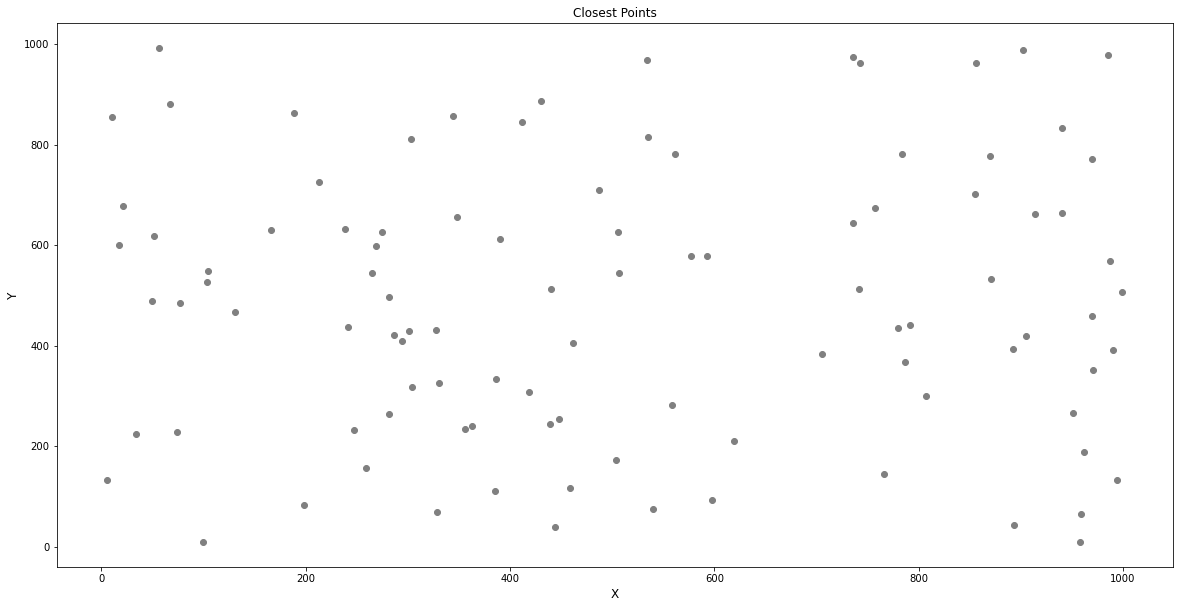

In [45]:
# Unpack points
x, y = zip(*points)

#print(x)
#print(y)

# Change the size of the figure
plt.figure(figsize=(20, 10))
# set x-axis label and specific size
plt.xlabel('X',size=12)
# set y-axis label and specific size
plt.ylabel('Y',size=12)
# set plot title with specific size
plt.title('Closest Points',size=12)
# plt plot
plt.scatter(x, y, color="grey")


plt.show()

## Brute Force Solution O(n^2)

In [46]:
import math

# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist

# Function Call
closest_points = closest_brute_force(points)

print(closest_points)

((363, 241), (356, 235), 9.219544457292887)


(363, 241) (356, 235) 9.219544457292887


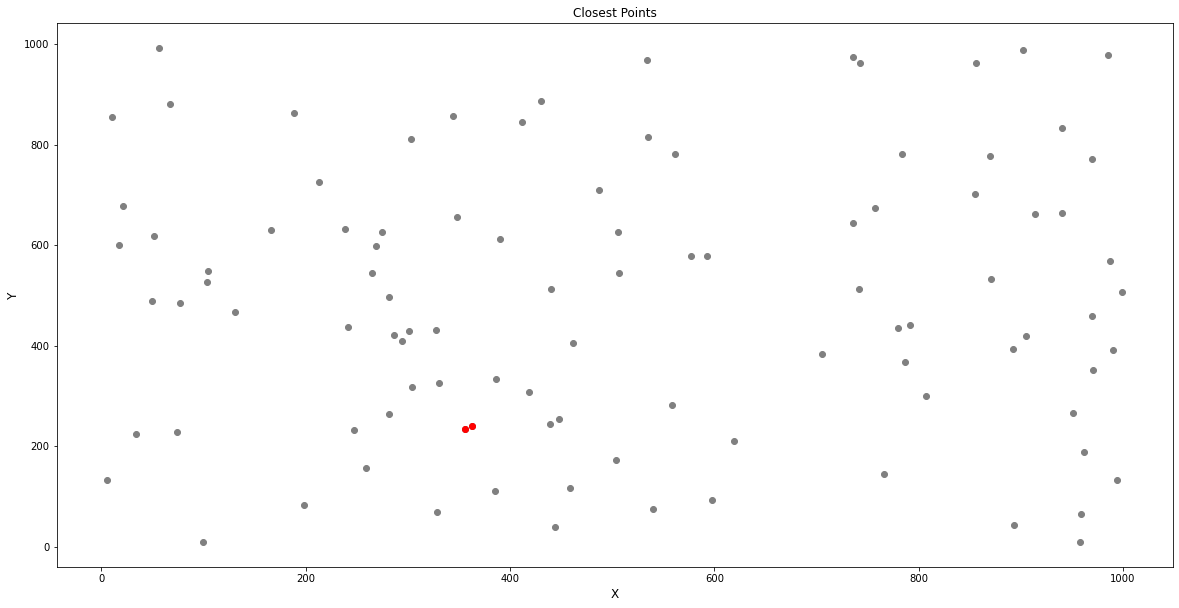

In [47]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b


plt.figure(figsize=(20, 10))
plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y, color="grey")
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()

## Divide And Conquer Solution  O(n log n) 

In [48]:
# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist


def recursive_closest(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]
        ysorted_left = []
        ysorted_right = []
        for point in ysorted:
            ysorted_left.append(point) if (point[0] <= midpoint[0]) else ysorted_right.append(point)
        (p1_left, p2_left, delta_left) = recursive_closest(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = recursive_closest(xsorted_right, ysorted_right)
        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)
        in_band = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]
        for i in range(len(in_band)):
            for j in range(i+1, min(i+7, len(in_band))):
                d = distance(in_band[i], in_band[j])
                if d < delta:
                    print(in_band[i], in_band[j])
                    (p1, p2, delta) = (in_band[i], in_band[j], d)
        return p1, p2, delta


def closest(points):
    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    return recursive_closest(xsorted, ysorted)

# Function Call
closest_points = closest(points)

print(closest_points)

(6, 133) (34, 224)
(17, 600) (52, 619)
(77, 485) (103, 527)
(77, 485) (50, 489)
(269, 598) (275, 626)
(304, 319) (331, 326)
(444, 40) (459, 117)
(439, 245) (448, 254)
(577, 578) (593, 579)
(787, 367) (780, 436)
(780, 436) (792, 441)
(807, 301) (892, 394)
(855, 702) (870, 777)
(914, 661) (940, 663)
(958, 11) (959, 65)
(990, 391) (999, 507)
(971, 352) (990, 391)
((356, 235), (363, 241), 9.219544457292887)


(356, 235) (363, 241) 9.219544457292887


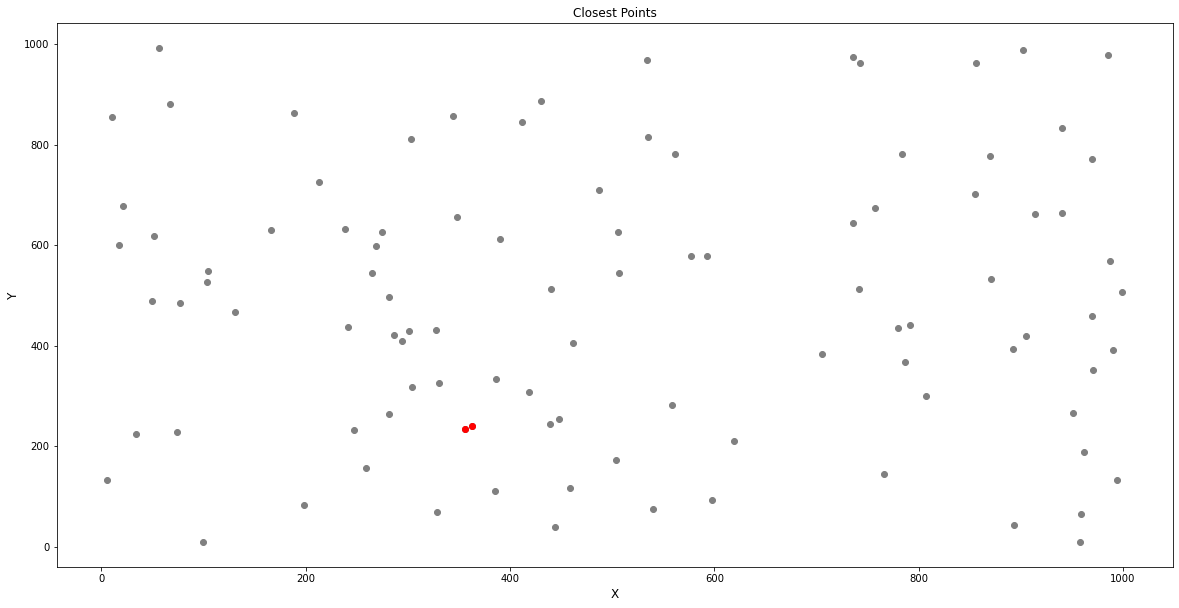

In [49]:
point_a, point_b, distance = closest_points
print(point_a, point_b, distance)
x_a, y_a = point_a
x_b, y_b = point_b

plt.figure(figsize=(20, 10))
plt.xlabel('X',size=12)
plt.ylabel('Y',size=12)
plt.title('Closest Points',size=12)
plt.scatter(x, y, color="grey")
plt.scatter(x_a, y_a, color="red")
plt.scatter(x_b, y_b, color="red")
plt.show()

## Measure Execution Time

In [50]:
import time

#### Brute Force Solution 

In [51]:
import time
import math

# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist


# Brute force
start_time = time.time()

closest_points = closest_brute_force(points)

end_time = time.time()

print(end_time - start_time)

0.010999679565429688


#### Divide And Conquer Solution

In [52]:
import time
import math

# Euclidian distance
def distance(p1, p2):
    d = math.sqrt(((p2[0] - p1[0])** 2) + ( (p2[1] - p1[1]) ** 2))
    return d


# Brute Force : Time O(n^2)
def closest_brute_force(points):
    min_dist = float("inf")
    p1 = None
    p2 = None

    for i in range(len(points)):
        for j in range(i+1, len(points)):
            d = distance(points[i], points[j])

            if d < min_dist:
                p1 = points[i]
                p2 = points[j]
                min_dist = d
    return p1, p2, min_dist


def recursive_closest(xsorted, ysorted):
    n = len(xsorted)
    if n <= 3:
        return closest_brute_force(xsorted)
    else:
        midpoint = xsorted[n//2]
        xsorted_left = xsorted[:n//2]
        xsorted_right = xsorted[n//2:]
        ysorted_left = []
        ysorted_right = []
        for point in ysorted:
            ysorted_left.append(point) if (point[0] <= midpoint[0]) else ysorted_right.append(point)
        (p1_left, p2_left, delta_left) = recursive_closest(xsorted_left, ysorted_left)
        (p1_right, p2_right, delta_right) = recursive_closest(xsorted_right, ysorted_right)
        (p1, p2, delta) = (p1_left, p2_left, delta_left) if (delta_left < delta_right) else (p1_right, p2_right, delta_right)
        in_band = [point for point in ysorted if midpoint[0]-delta < point[0] < midpoint[0]+delta]
        for i in range(len(in_band)):
            for j in range(i+1, min(i+7, len(in_band))):
                d = distance(in_band[i], in_band[j])
                if d < delta:
                    print(in_band[i], in_band[j])
                    (p1, p2, delta) = (in_band[i], in_band[j], d)
        return p1, p2, delta


def closest(points):
    xsorted = sorted(points, key=lambda point: point[0])
    ysorted = sorted(points, key=lambda point: point[1])
    return recursive_closest(xsorted, ysorted)

# Divide and Conquer
start_time = time.time()

closest_points = closest_brute_force(points)

end_time = time.time()

print(end_time - start_time)

0.009001731872558594
